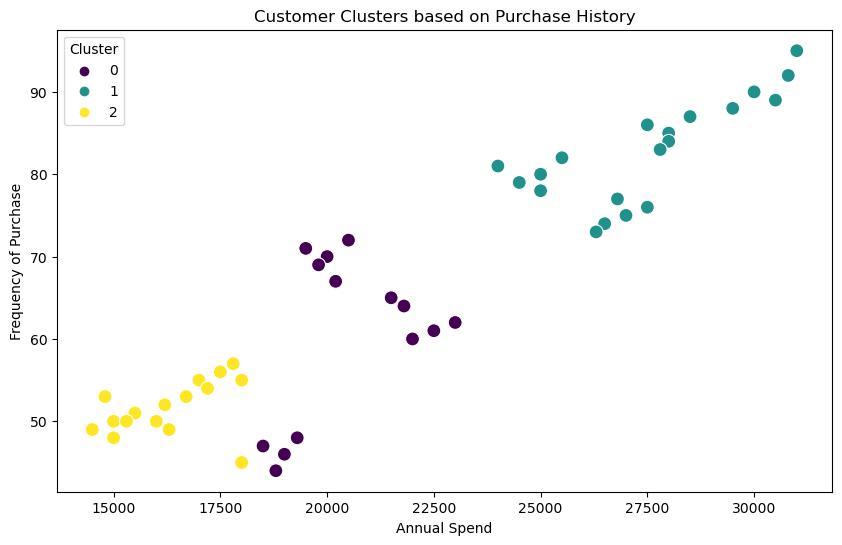

    CustomerID  Annual_Spend  Frequency_of_Purchase  Average_Purchase_Value  \
0            1         15000                     50                     300   
1            2         22000                     60                     367   
2            3         17000                     55                     309   
3            4         18000                     45                     400   
4            5         25000                     80                     312   
5            6         27000                     75                     360   
6            7         16000                     50                     320   
7            8         20000                     70                     285   
8            9         30000                     90                     333   
9           10         28000                     85                     329   
10          11         15000                     48                     305   
11          12         21500                     65 

In [2]:
import os
# Set environment variable to avoid memory leak issue before any sklearn import
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific sklearn warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Load dataset from CSV file
df = pd.read_csv('Mall_Customer.csv')

# Select features for clustering
X = df[['Annual_Spend', 'Frequency_of_Purchase', 'Average_Purchase_Value']]

# Apply K-means clustering with explicit n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Spend', y='Frequency_of_Purchase', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters based on Purchase History')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency of Purchase')
plt.show()

print(df)